In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
np.random.seed(5)

In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy(n=11):
    inputs = []
    labels = []
    step = 1/(n-1)
    for i in range(n):
        inputs.append([step*i, step*i])
        labels.append(0)
        
        if i == int((n-1)/2):
            continue
        
        inputs.append([step*i, 1 - step*i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(n*2 - 1,1)
def show_data(xs, ys, ts):
    cm = LinearSegmentedColormap.from_list(
        'mymap', [(1, 0, 0), (0, 0, 1)], N=2)
    n = len(xs)
    plt.figure(figsize=(5*n, 5))
    for i, x, y, t in zip(range(n), xs, ys, ts):
        y = np.round(y)
        plt.subplot(1,n, i+1)
        plt.title(t, fontsize=18)
        plt.scatter(x[:,0], x[:,1], c=y[:,0], cmap=cm)
    
    plt.show()
def show_result(x, y, pred_y):
    x = np.array(x)
    y = np.array(y)
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')

    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(sigmoid(x), 1.0 - sigmoid(x))

def MSE_loss(y, y_hat):
    return np.mean((y - y_hat)**2)
    
def derivative_MSE_loss(y, y_hat):
    return (y - y_hat)*(2/y.shape[0])

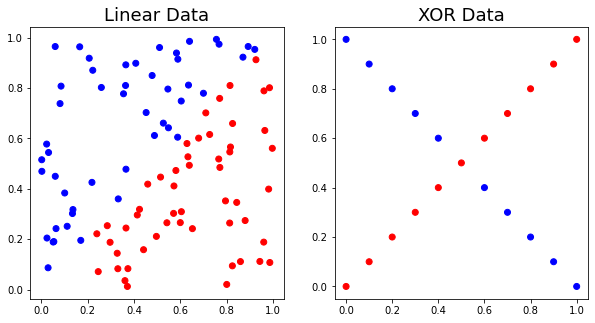

In [3]:
x1, y1 = generate_linear()
x2, y2 = generate_XOR_easy()
show_data([x1,x2], [y1,y2], ['Linear Data', 'XOR Data'])

In [72]:
class linear:
    def __init__(self,in_size,out_size,act):
        self.prev_X = np.zeros((1,in_size))
        self.prev_Y = np.zeros((1,out_size))
        self.W = np.random.uniform(0,1,(in_size,out_size))
        self.W_grad = np.zeros((in_size,out_size))
        self.backward_gradient = np.zeros(out_size)
        self.act = act
        #print(f"Initial weight:{self.W}")
        

    #calculate the value W*X, and store X for gradient calculation
    def forward(self,X):
        #self.prev_X = X
        self.prev_X = np.copy(X)
        self.prev_Y = np.matmul(X,self.W)
        #print(f"X*M={self.prev_Y}")
        #print(f"sigmoid(X*M)={sigmoid(self.prev_Y)}")
        if(self.act == 'sigmoid'):
            return sigmoid(self.prev_Y)


    def backword(self,derivative):
        if(self.act == 'sigmoid'):
            #print(f"input of act{self.prev_Y}")
            #print(f"act{derivative_sigmoid(self.prev_Y)}")
            self.backward_gradient = derivative*derivative_sigmoid(self.prev_Y)
        return np.matmul(self.W,self.backward_gradient.T)

    def get_weights(self,learning_rate):
        for i in range(len(self.prev_X[0])):
            for j in range(len(self.prev_Y[0])):
                self.W_grad[i][j] -= learning_rate*self.prev_X[0][i]*self.backward_gradient[0][j]
        #print("Gradient After BP:")
        #print(self.W_grad)
        #self.W_grad[:] = 0
    def update_weights(self):
        #print("Before")
        #print(self.W)
        self.W += self.W_grad
        
        #print("Updated Grad")
        #print(self.W_grad)
        self.W_grad[:] = 0
        #print("After")
        #print(self.W)
        
    
    def debug(self):
        return self.W
        
        

In [73]:
class My_NN:
    def __init__(self,learning_rate = 0.1):
        self.layers = []
        self.learning_rate = learning_rate
    def forward(self,X):
        in_data = X
        for l in self.layers:
            in_data = l.forward(in_data)
        return in_data
    def backword(self,derivative):
        back_dev = derivative
        for l in reversed(self.layers):
            
            back_dev = l.backword(back_dev)
            l.get_weights(self.learning_rate)
        #return back_dev
        
    def add_linear_layer(self,in_size,out_size,act):
        l = linear(in_size,out_size,act)
        self.layers.append(l)
        
    def update_weights(self):
        for l in self.layers:
            l.update_weights()
            
    def show_weights(self):
        for l in self.layers:
            print(l.debug())
    

In [89]:
n = My_NN()

In [90]:
n.add_linear_layer(in_size = 2, out_size = 4, act = 'sigmoid')
n.add_linear_layer(in_size = 4, out_size = 1, act = 'sigmoid')

In [ ]:
test_x = x1[1:5]
test_y = y1[1:5]
for i in range(10000):
    print(f"epoch {i}")
    loss = 0
    for data,label in zip(x1[2:4],y1[2:4]):
        ret = n.forward(np.array(data).reshape(1,2))     
        
        print(f"MSE:{MSE_loss(ret,label)}")
        loss += MSE_loss(ret,label)
        #print(MSE_loss(ret,label))
        #print(f"d MSE:{derivative_MSE_loss(ret,label)}")
        n.backword(derivative_MSE_loss(ret,label))
        #break
        print(f"ans:{ret}")
        
    #print(loss/100)
    n.update_weights()
    print("             ")
    
    #n.show_weights()
    
    

epoch 0
MSE:0.05114402167748879
ans:[[0.77384956]]
MSE:0.6133805308827952
ans:[[0.78318614]]
             
epoch 1
MSE:0.05354717412280544
ans:[[0.76859738]]
MSE:0.6051162982485467
ans:[[0.77789222]]
             
epoch 2
MSE:0.056039037509191855
ans:[[0.76327434]]
MSE:0.5967894717408456
ans:[[0.7725215]]
             
epoch 3
MSE:0.05861895490384315
ans:[[0.75788648]]
MSE:0.5884117696777459
ans:[[0.76708003]]
             
epoch 4
MSE:0.06128580949286122
ans:[[0.75244029]]
MSE:0.5799954255416567
ans:[[0.76157431]]
             
epoch 5
MSE:0.0640380082305059
ans:[[0.74694268]]
MSE:0.5715531052120889
ans:[[0.75601131]]
             
epoch 6
MSE:0.06687347124521009
ans:[[0.74140095]]
MSE:0.5630978154362057
ans:[[0.75039844]]
             
epoch 7
MSE:0.06978962759195563
ans:[[0.73582273]]
MSE:0.5546428049605958
ans:[[0.74474345]]
             
epoch 8
MSE:0.07278341779982832
ans:[[0.73021598]]
MSE:0.546201460008836
ans:[[0.73905444]]
             
epoch 9
MSE:0.07585130349653241
ans:[[0

             
epoch 261
MSE:0.26076111679674996
ans:[[0.48935226]]
MSE:0.24012517351752963
ans:[[0.49002569]]
             
epoch 262
MSE:0.2607645208997794
ans:[[0.48934892]]
MSE:0.24011597323928596
ans:[[0.4900163]]
             
epoch 263
MSE:0.2607678795810576
ans:[[0.48934564]]
MSE:0.24010682059490943
ans:[[0.49000696]]
             
epoch 264
MSE:0.26077119367757473
ans:[[0.48934239]]
MSE:0.24009771474373195
ans:[[0.48999767]]
             
epoch 265
MSE:0.2607744639938439
ans:[[0.48933919]]
MSE:0.2400886548776047
ans:[[0.48998842]]
             
epoch 266
MSE:0.26077769130317346
ans:[[0.48933603]]
MSE:0.2400796402196236
ans:[[0.48997922]]
             
epoch 267
MSE:0.26078087634888947
ans:[[0.48933291]]
MSE:0.24007067002290544
ans:[[0.48997007]]
             
epoch 268
MSE:0.26078401984550986
ans:[[0.48932983]]
MSE:0.24006174356941226
ans:[[0.48996096]]
             
epoch 269
MSE:0.26078712247987185
ans:[[0.48932679]]
MSE:0.2400528601688201
ans:[[0.4899519]]
             
epoc

ans:[[0.48940601]]
MSE:0.23871261095609636
ans:[[0.48858225]]
             
epoch 527
MSE:0.2607028663222576
ans:[[0.4894093]]
MSE:0.23871065410077422
ans:[[0.48858024]]
             
epoch 528
MSE:0.26069949138705967
ans:[[0.4894126]]
MSE:0.2387087218244609
ans:[[0.48857827]]
             
epoch 529
MSE:0.26069609334782406
ans:[[0.48941593]]
MSE:0.23870681412566222
ans:[[0.48857631]]
             
epoch 530
MSE:0.2606926722030164
ans:[[0.48941928]]
MSE:0.238704931002928
ans:[[0.48857439]]
             
epoch 531
MSE:0.26068922795105237
ans:[[0.48942265]]
MSE:0.23870307245485262
ans:[[0.48857248]]
             
epoch 532
MSE:0.26068576059029713
ans:[[0.48942605]]
MSE:0.23870123848007369
ans:[[0.48857061]]
             
epoch 533
MSE:0.26068227011906614
ans:[[0.48942947]]
MSE:0.23869942907727368
ans:[[0.48856876]]
             
epoch 534
MSE:0.2606787565356247
ans:[[0.48943291]]
MSE:0.23869764424517856
ans:[[0.48856693]]
             
epoch 535
MSE:0.26067521983818803
ans:[[0.48943637]]

ans:[[0.49114213]]
MSE:0.23908620026030517
ans:[[0.48896442]]
             
epoch 798
MSE:0.2589264880566506
ans:[[0.4911518]]
MSE:0.23909099340029372
ans:[[0.48896932]]
             
epoch 799
MSE:0.258916621271732
ans:[[0.4911615]]
MSE:0.23909581234141794
ans:[[0.48897425]]
             
epoch 800
MSE:0.25890672895082706
ans:[[0.49117122]]
MSE:0.23910065709477568
ans:[[0.4889792]]
             
epoch 801
MSE:0.25889681107621904
ans:[[0.49118096]]
MSE:0.23910552767152038
ans:[[0.48898418]]
             
epoch 802
MSE:0.2588868676301137
ans:[[0.49119074]]
MSE:0.2391104240828615
ans:[[0.48898919]]
             
epoch 803
MSE:0.2588768985946393
ans:[[0.49120053]]
MSE:0.23911534634006465
ans:[[0.48899422]]
             
epoch 804
MSE:0.2588669039518456
ans:[[0.49121035]]
MSE:0.23912029445445152
ans:[[0.48899928]]
             
epoch 805
MSE:0.2588568836837047
ans:[[0.4912202]]
MSE:0.2391252684374002
ans:[[0.48900436]]
             
epoch 806
MSE:0.25884683777211076
ans:[[0.49123007]]
MSE:

ans:[[0.49478664]]
MSE:0.2413919099527881
ans:[[0.49131651]]
             
epoch 1070
MSE:0.25522279713089896
ans:[[0.4948042]]
MSE:0.24140434988000614
ans:[[0.49132917]]
             
epoch 1071
MSE:0.2552050221494393
ans:[[0.49482179]]
MSE:0.2414168212322299
ans:[[0.49134186]]
             
epoch 1072
MSE:0.25518721313916587
ans:[[0.49483942]]
MSE:0.2414293240424435
ans:[[0.49135458]]
             
epoch 1073
MSE:0.25516937005145723
ans:[[0.49485708]]
MSE:0.24144185834374599
ans:[[0.49136734]]
             
epoch 1074
MSE:0.25515149283753036
ans:[[0.49487478]]
MSE:0.2414544241693519
ans:[[0.49138012]]
             
epoch 1075
MSE:0.2551335814484399
ans:[[0.49489251]]
MSE:0.241467021552591
ans:[[0.49139294]]
             
epoch 1076
MSE:0.2551156358350789
ans:[[0.49491027]]
MSE:0.2414796505269092
ans:[[0.49140579]]
             
epoch 1077
MSE:0.2550976559481773
ans:[[0.49492807]]
MSE:0.2414923111258683
ans:[[0.49141867]]
             
epoch 1078
MSE:0.2550796417383019
ans:[[0.4949459

ans:[[0.5007204]]
MSE:0.2458269407322836
ans:[[0.49580938]]
             
epoch 1331
MSE:0.24925129890522313
ans:[[0.50074926]]
MSE:0.24584911058915318
ans:[[0.49583174]]
             
epoch 1332
MSE:0.24922242679913795
ans:[[0.50077818]]
MSE:0.2458713255365934
ans:[[0.49585414]]
             
epoch 1333
MSE:0.2491935010224577
ans:[[0.50080715]]
MSE:0.2458935856516881
ans:[[0.49587658]]
             
epoch 1334
MSE:0.24916452146680554
ans:[[0.50083618]]
MSE:0.2459158910117536
ans:[[0.49589907]]
             
epoch 1335
MSE:0.2491354880235015
ans:[[0.50086526]]
MSE:0.24593824169434028
ans:[[0.49592161]]
             
epoch 1336
MSE:0.24910640058356173
ans:[[0.5008944]]
MSE:0.2459606377772323
ans:[[0.49594419]]
             
epoch 1337
MSE:0.24907725903769873
ans:[[0.50092359]]
MSE:0.2459830793384492
ans:[[0.49596681]]
             
epoch 1338
MSE:0.24904806327632006
ans:[[0.50095284]]
MSE:0.24600556645624508
ans:[[0.49598948]]
             
epoch 1339
MSE:0.2490188131895277
ans:[[0.5009

ans:[[0.50318517]]
             
epoch 1586
MSE:0.2397988346289555
ans:[[0.51030741]]
MSE:0.25323219186745244
ans:[[0.50322181]]
             
epoch 1587
MSE:0.23975186928005954
ans:[[0.51035536]]
MSE:0.2532691453274146
ans:[[0.50325853]]
             
epoch 1588
MSE:0.23970481187804457
ans:[[0.51040342]]
MSE:0.25330617236932645
ans:[[0.50329531]]
             
epoch 1589
MSE:0.23965766223044813
ans:[[0.51045157]]
MSE:0.2533432731404215
ans:[[0.50333217]]
             
epoch 1590
MSE:0.23961042014453893
ans:[[0.51049983]]
MSE:0.25338044778817836
ans:[[0.5033691]]
             
epoch 1591
MSE:0.23956308542731808
ans:[[0.51054818]]
MSE:0.25341769646032014
ans:[[0.50340609]]
             
epoch 1592
MSE:0.239515657885521
ans:[[0.51059663]]
MSE:0.25345501930481185
ans:[[0.50344316]]
             
epoch 1593
MSE:0.23946813732561906
ans:[[0.51064518]]
MSE:0.2534924164698604
ans:[[0.5034803]]
             
epoch 1594
MSE:0.2394205235538214
ans:[[0.51069383]]
MSE:0.25352988810391247
ans:[[0.50

ans:[[0.52763875]]
MSE:0.26638243038204557
ans:[[0.5161225]]
             
epoch 1857
MSE:0.22304614452346058
ans:[[0.52772239]]
MSE:0.2664447519380584
ans:[[0.51618287]]
             
epoch 1858
MSE:0.22296699469455475
ans:[[0.52780619]]
MSE:0.26650718428598164
ans:[[0.51624334]]
             
epoch 1859
MSE:0.22288770256062654
ans:[[0.52789016]]
MSE:0.2665697274736914
ans:[[0.51630391]]
             
epoch 1860
MSE:0.22280826801701056
ans:[[0.52797429]]
MSE:0.26663238154746777
ans:[[0.51636458]]
             
epoch 1861
MSE:0.22272869096042466
ans:[[0.52805859]]
MSE:0.2666951465519813
ans:[[0.51642535]]
             
epoch 1862
MSE:0.22264897128898037
ans:[[0.52814306]]
MSE:0.26675802253027864
ans:[[0.51648623]]
             
epoch 1863
MSE:0.22256910890219453
ans:[[0.52822769]]
MSE:0.26682100952376864
ans:[[0.5165472]]
             
epoch 1864
MSE:0.22248910370100056
ans:[[0.52831249]]
MSE:0.26688410757220793
ans:[[0.51660827]]
             
epoch 1865
MSE:0.2224089555877594
ans:[[0

ans:[[0.55481738]]
MSE:0.28577059526309473
ans:[[0.53457515]]
             
epoch 2114
MSE:0.19807423972349966
ans:[[0.55494468]]
MSE:0.28585615521289215
ans:[[0.53465517]]
             
epoch 2115
MSE:0.19796081376543762
ans:[[0.55507213]]
MSE:0.28594175182628384
ans:[[0.53473522]]
             
epoch 2116
MSE:0.19784729157079883
ans:[[0.55519972]]
MSE:0.2860273844229876
ans:[[0.53481528]]
             
epoch 2117
MSE:0.19773367366032168
ans:[[0.55532745]]
MSE:0.28611305232038275
ans:[[0.53489537]]
             
epoch 2118
MSE:0.19761996055709719
ans:[[0.55545533]]
MSE:0.2861987548335358
ans:[[0.53497547]]
             
epoch 2119
MSE:0.19750615278655453
ans:[[0.55558336]]
MSE:0.2862844912752242
ans:[[0.5350556]]
             
epoch 2120
MSE:0.197392250876447
ans:[[0.55571152]]
MSE:0.2863702609559631
ans:[[0.53513574]]
             
epoch 2121
MSE:0.19727825535683613
ans:[[0.55583983]]
MSE:0.28645606318402944
ans:[[0.5352159]]
             
epoch 2122
MSE:0.19716416676007734
ans:[[0.5

ans:[[0.55368364]]
             
epoch 2366
MSE:0.16804518636447377
ans:[[0.59006685]]
MSE:0.3066377948118317
ans:[[0.55374886]]
             
epoch 2367
MSE:0.16792686007647942
ans:[[0.5902112]]
MSE:0.3067098878650989
ans:[[0.55381395]]
             
epoch 2368
MSE:0.16780858873245766
ans:[[0.59035553]]
MSE:0.306781853415441
ans:[[0.55387892]]
             
epoch 2369
MSE:0.16769037279179388
ans:[[0.59049985]]
MSE:0.30685369113414845
ans:[[0.55394376]]
             
epoch 2370
MSE:0.16757221271148307
ans:[[0.59064415]]
MSE:0.3069254006962741
ans:[[0.55400848]]
             
epoch 2371
MSE:0.16745410894612447
ans:[[0.59078843]]
MSE:0.3069969817806314
ans:[[0.55407308]]
             
epoch 2372
MSE:0.16733606194791567
ans:[[0.59093269]]
MSE:0.30706843406979095
ans:[[0.55413756]]
             
epoch 2373
MSE:0.16721807216664772
ans:[[0.59107694]]
MSE:0.30713975725007947
ans:[[0.55420191]]
             
epoch 2374
MSE:0.16710014004970022
ans:[[0.59122116]]
MSE:0.30721095101157575
ans:[[0.

ans:[[0.62745925]]
MSE:0.3212193169631672
ans:[[0.56676213]]
             
epoch 2640
MSE:0.13869261090473836
ans:[[0.62758543]]
MSE:0.321254681437882
ans:[[0.56679333]]
             
epoch 2641
MSE:0.13859871133115922
ans:[[0.62771152]]
MSE:0.3212899304881283
ans:[[0.56682443]]
             
epoch 2642
MSE:0.13850491134953435
ans:[[0.62783752]]
MSE:0.3213250643552015
ans:[[0.56685542]]
             
epoch 2643
MSE:0.13841121090971123
ans:[[0.62796343]]
MSE:0.32136008328066035
ans:[[0.56688631]]
             
epoch 2644
MSE:0.1383176099607308
ans:[[0.62808924]]
MSE:0.3213949875063192
ans:[[0.56691709]]
             
epoch 2645
MSE:0.1382241084508347
ans:[[0.62821497]]
MSE:0.3214297772742386
ans:[[0.56694777]]
             
epoch 2646
MSE:0.1381307063274716
ans:[[0.6283406]]
MSE:0.32146445282671726
ans:[[0.56697835]]
             
epoch 2647
MSE:0.1380374035373053
ans:[[0.62846615]]
MSE:0.32149901440628303
ans:[[0.56700883]]
             
epoch 2648
MSE:0.13794420002622043
ans:[[0.62859

ans:[[0.65789305]]
MSE:0.32729447356454466
ans:[[0.57209656]]
             
epoch 2906
MSE:0.11696652924885445
ans:[[0.6579963]]
MSE:0.3273072904184644
ans:[[0.57210776]]
             
epoch 2907
MSE:0.11689596465973805
ans:[[0.65809948]]
MSE:0.32732004946725757
ans:[[0.57211891]]
             
epoch 2908
MSE:0.11682547364237633
ans:[[0.65820258]]
MSE:0.32733275087424113
ans:[[0.57213001]]
             
epoch 2909
MSE:0.11675505609009103
ans:[[0.65830561]]
MSE:0.3273453948022843
ans:[[0.57214106]]
             
epoch 2910
MSE:0.1166847118963063
ans:[[0.65840856]]
MSE:0.3273579814138067
ans:[[0.57215206]]
             
epoch 2911
MSE:0.11661444095454976
ans:[[0.65851143]]
MSE:0.3273705108707803
ans:[[0.57216301]]
             
epoch 2912
MSE:0.11654424315845308
ans:[[0.65861423]]
MSE:0.32738298333473004
ans:[[0.57217391]]
             
epoch 2913
MSE:0.11647411840175287
ans:[[0.65871695]]
MSE:0.3273953989667336
ans:[[0.57218476]]
             
epoch 2914
MSE:0.1164040665782916
ans:[[0.6

ans:[[0.68317816]]
MSE:0.32909529010963556
ans:[[0.57366828]]
             
epoch 3175
MSE:0.1003218296817003
ans:[[0.68326379]]
MSE:0.3290971703460532
ans:[[0.57366991]]
             
epoch 3176
MSE:0.10026763334470179
ans:[[0.68334935]]
MSE:0.32909902310699624
ans:[[0.57367153]]
             
epoch 3177
MSE:0.10021348676137004
ans:[[0.68343486]]
MSE:0.32910084846491566
ans:[[0.57367312]]
             
epoch 3178
MSE:0.1001593898621878
ans:[[0.68352032]]
MSE:0.3291026464920404
ans:[[0.57367469]]
             
epoch 3179
MSE:0.10010534257776721
ans:[[0.68360572]]
MSE:0.3291044172603774
ans:[[0.57367623]]
             
epoch 3180
MSE:0.10005134483885039
ans:[[0.68369106]]
MSE:0.32910616084171235
ans:[[0.57367775]]
             
epoch 3181
MSE:0.0999973965763094
ans:[[0.68377635]]
MSE:0.32910787730761026
ans:[[0.57367925]]
             
epoch 3182
MSE:0.09994349772114541
ans:[[0.68386158]]
MSE:0.329109566729417
ans:[[0.57368072]]
             
epoch 3183
MSE:0.09988964820448867
ans:[[0.6

ans:[[0.70461419]]
MSE:0.3287924901151248
ans:[[0.5734043]]
             
epoch 3447
MSE:0.08720989783514643
ans:[[0.70468678]]
MSE:0.3287889697032402
ans:[[0.57340123]]
             
epoch 3448
MSE:0.08716705405985041
ans:[[0.70475933]]
MSE:0.3287854353314715
ans:[[0.57339815]]
             
epoch 3449
MSE:0.08712424518788824
ans:[[0.70483184]]
MSE:0.32878188703264605
ans:[[0.57339505]]
             
epoch 3450
MSE:0.08708147117707628
ans:[[0.7049043]]
MSE:0.3287783248395026
ans:[[0.57339195]]
             
epoch 3451
MSE:0.08703873198530412
ans:[[0.70497673]]
MSE:0.3287747487846921
ans:[[0.57338883]]
             
epoch 3452
MSE:0.08699602757053503
ans:[[0.70504911]]
MSE:0.32877115890077735
ans:[[0.5733857]]
             
epoch 3453
MSE:0.08695335789080497
ans:[[0.70512145]]
MSE:0.32876755522023426
ans:[[0.57338256]]
             
epoch 3454
MSE:0.08691072290422293
ans:[[0.70519375]]
MSE:0.3287639377754516
ans:[[0.5733794]]
             
epoch 3455
MSE:0.0868681225689707
ans:[[0.7052

ans:[[0.7227072]]
MSE:0.3274379625273172
ans:[[0.57222195]]
             
epoch 3715
MSE:0.07685647166239651
ans:[[0.72277]]
MSE:0.32743164704612976
ans:[[0.57221643]]
             
epoch 3716
MSE:0.07682167455417109
ans:[[0.72283277]]
MSE:0.3274253239911869
ans:[[0.57221091]]
             
epoch 3717
MSE:0.07678690321612841
ans:[[0.7228955]]
MSE:0.32741899337947855
ans:[[0.57220538]]
             
epoch 3718
MSE:0.07675215762089663
ans:[[0.7229582]]
MSE:0.3274126552279564
ans:[[0.57219984]]
             
epoch 3719
MSE:0.07671743774114452
ans:[[0.72302087]]
MSE:0.3274063095535345
ans:[[0.57219429]]
             
epoch 3720
MSE:0.07668274354958152
ans:[[0.72308351]]
MSE:0.32739995637308955
ans:[[0.57218874]]
             
epoch 3721
MSE:0.07664807501895757
ans:[[0.72314611]]
MSE:0.3273935957034603
ans:[[0.57218318]]
             
epoch 3722
MSE:0.07661343212206306
ans:[[0.72320868]]
MSE:0.327387227561448
ans:[[0.57217762]]
             
epoch 3723
MSE:0.07657881483172879
ans:[[0.723271

ans:[[0.73802016]]
MSE:0.32558398423595236
ans:[[0.57059967]]
             
epoch 3975
MSE:0.06860450171348274
ans:[[0.73807539]]
MSE:0.3255761791694809
ans:[[0.57059283]]
             
epoch 3976
MSE:0.06857558736517025
ans:[[0.73813059]]
MSE:0.32556836992869437
ans:[[0.57058599]]
             
epoch 3977
MSE:0.06854669283347622
ans:[[0.73818577]]
MSE:0.32556055652353233
ans:[[0.57057914]]
             
epoch 3978
MSE:0.06851781809932095
ans:[[0.73824092]]
MSE:0.3255527389639157
ans:[[0.57057229]]
             
epoch 3979
MSE:0.06848896314364927
ans:[[0.73829604]]
MSE:0.3255449172597469
ans:[[0.57056544]]
             
epoch 3980
MSE:0.06846012794743084
ans:[[0.73835114]]
MSE:0.32553709142090875
ans:[[0.57055858]]
             
epoch 3981
MSE:0.06843131249165989
ans:[[0.73840621]]
MSE:0.32552926145726524
ans:[[0.57055172]]
             
epoch 3982
MSE:0.06840251675735537
ans:[[0.73846125]]
MSE:0.32552142737866213
ans:[[0.57054485]]
             
epoch 3983
MSE:0.06837374072556075
ans:

ans:[[0.56867979]]
             
epoch 4240
MSE:0.06158143172960366
ans:[[0.75184394]]
MSE:0.32338809167051324
ans:[[0.56867222]]
             
epoch 4241
MSE:0.06155716947930936
ans:[[0.75189283]]
MSE:0.3233794755484203
ans:[[0.56866464]]
             
epoch 4242
MSE:0.06153292273958196
ans:[[0.75194169]]
MSE:0.32337085734251714
ans:[[0.56865706]]
             
epoch 4243
MSE:0.06150869149664103
ans:[[0.75199054]]
MSE:0.3233622370589343
ans:[[0.56864949]]
             
epoch 4244
MSE:0.061484475736722145
ans:[[0.75203937]]
MSE:0.3233536147037915
ans:[[0.5686419]]
             
epoch 4245
MSE:0.061460275446076865
ans:[[0.75208817]]
MSE:0.32334499028319774
ans:[[0.56863432]]
             
epoch 4246
MSE:0.06143609061097281
ans:[[0.75213695]]
MSE:0.3233363638032519
ans:[[0.56862674]]
             
epoch 4247
MSE:0.06141192121769362
ans:[[0.75218571]]
MSE:0.32332773527004166
ans:[[0.56861915]]
             
epoch 4248
MSE:0.061387767252538805
ans:[[0.75223445]]
MSE:0.32331910468964437
ans

ans:[[0.76378041]]
MSE:0.3211116433324074
ans:[[0.56666714]]
             
epoch 4499
MSE:0.05577902061715797
ans:[[0.76382417]]
MSE:0.3211026660456454
ans:[[0.56665922]]
             
epoch 4500
MSE:0.05575835708141011
ans:[[0.76386792]]
MSE:0.3210936879546676
ans:[[0.56665129]]
             
epoch 4501
MSE:0.055737705961629136
ans:[[0.76391166]]
MSE:0.32108470906342707
ans:[[0.56664337]]
             
epoch 4502
MSE:0.05571706724749856
ans:[[0.76395537]]
MSE:0.3210757293758702
ans:[[0.56663545]]
             
epoch 4503
MSE:0.05569644092871269
ans:[[0.76399907]]
MSE:0.32106674889593684
ans:[[0.56662752]]
             
epoch 4504
MSE:0.0556758269949772
ans:[[0.76404274]]
MSE:0.32105776762756033
ans:[[0.5666196]]
             
epoch 4505
MSE:0.05565522543600848
ans:[[0.7640864]]
MSE:0.3210487855746672
ans:[[0.56661167]]
             
epoch 4506
MSE:0.0556346362415342
ans:[[0.76413004]]
MSE:0.32103980274117755
ans:[[0.56660374]]
             
epoch 4507
MSE:0.05561405940129278
ans:[[0.7

ans:[[0.77477645]]
MSE:0.31871543438579425
ans:[[0.56454888]]
             
epoch 4764
MSE:0.050707935456553124
ans:[[0.77481577]]
MSE:0.31870636404366626
ans:[[0.56454084]]
             
epoch 4765
MSE:0.05069023247170658
ans:[[0.77485509]]
MSE:0.3186972937442989
ans:[[0.56453281]]
             
epoch 4766
MSE:0.05067253951495338
ans:[[0.77489438]]
MSE:0.3186882234902293
ans:[[0.56452478]]
             
epoch 4767
MSE:0.05065485657845604
ans:[[0.77493366]]
MSE:0.3186791532839902
ans:[[0.56451674]]
             
epoch 4768
MSE:0.05063718365438485
ans:[[0.77497293]]
MSE:0.31867008312811035
ans:[[0.56450871]]
             
epoch 4769
MSE:0.05061952073491791
ans:[[0.77501218]]
MSE:0.3186610130251142
ans:[[0.56450068]]
             
epoch 4770
MSE:0.05060186781224102
ans:[[0.77505141]]
MSE:0.3186519429775217
ans:[[0.56449264]]
             
epoch 4771
MSE:0.05058422487854817
ans:[[0.77509063]]
MSE:0.318642872987849
ans:[[0.56448461]]
             
epoch 4772
MSE:0.05056659192604082
ans:[[0

ans:[[0.56240761]]
             
epoch 5031
MSE:0.04631428730338017
ans:[[0.78479246]]
MSE:0.3162933344465816
ans:[[0.56239962]]
             
epoch 5032
MSE:0.046299006261921884
ans:[[0.78482796]]
MSE:0.3162843541069775
ans:[[0.56239164]]
             
epoch 5033
MSE:0.04628373340698534
ans:[[0.78486345]]
MSE:0.31627537435666797
ans:[[0.56238365]]
             
epoch 5034
MSE:0.046268468732524715
ans:[[0.78489893]]
MSE:0.31626639519725525
ans:[[0.56237567]]
             
epoch 5035
MSE:0.04625321223249989
ans:[[0.7849344]]
MSE:0.31625741663033924
ans:[[0.56236769]]
             
epoch 5036
MSE:0.046237963900876436
ans:[[0.78496985]]
MSE:0.3162484386575168
ans:[[0.56235971]]
             
epoch 5037
MSE:0.04622272373162565
ans:[[0.78500529]]
MSE:0.31623946128038205
ans:[[0.56235172]]
             
epoch 5038
MSE:0.04620749171872445
ans:[[0.78504072]]
MSE:0.3162304845005262
ans:[[0.56234374]]
             
epoch 5039
MSE:0.04619226785615558
ans:[[0.78507613]]
MSE:0.31622150831953794
ans

ans:[[0.79382748]]
MSE:0.3139209976157564
ans:[[0.56028653]]
             
epoch 5299
MSE:0.0424938153184187
ans:[[0.79385972]]
MSE:0.31391222350847925
ans:[[0.5602787]]
             
epoch 5300
MSE:0.042480528748787896
ans:[[0.79389195]]
MSE:0.31390345033048367
ans:[[0.56027087]]
             
epoch 5301
MSE:0.04246724893018399
ans:[[0.79392417]]
MSE:0.3138946780827528
ans:[[0.56026304]]
             
epoch 5302
MSE:0.04245397585787873
ans:[[0.79395637]]
MSE:0.3138859067662681
ans:[[0.56025522]]
             
epoch 5303
MSE:0.04244070952714852
ans:[[0.79398857]]
MSE:0.3138771363820087
ans:[[0.56024739]]
             
epoch 5304
MSE:0.04242744993327379
ans:[[0.79402075]]
MSE:0.3138683669309519
ans:[[0.56023956]]
             
epoch 5305
MSE:0.04241419707153907
ans:[[0.79405293]]
MSE:0.3138595984140734
ans:[[0.56023174]]
             
epoch 5306
MSE:0.04240095093723316
ans:[[0.79408509]]
MSE:0.31385083083234694
ans:[[0.56022391]]
             
epoch 5307
MSE:0.04238771152564912
ans:[[0.

ans:[[0.80193356]]
MSE:0.3116480295478586
ans:[[0.55825445]]
             
epoch 5562
MSE:0.039218646591245326
ans:[[0.80196302]]
MSE:0.31163952856160243
ans:[[0.55824683]]
             
epoch 5563
MSE:0.03920698444991601
ans:[[0.80199246]]
MSE:0.31163102870579995
ans:[[0.55823922]]
             
epoch 5564
MSE:0.03919532794875126
ans:[[0.8020219]]
MSE:0.3116225299810229
ans:[[0.55823161]]
             
epoch 5565
MSE:0.03918367708399019
ans:[[0.80205133]]
MSE:0.3116140323878417
ans:[[0.558224]]
             
epoch 5566
MSE:0.03917203185187504
ans:[[0.80208074]]
MSE:0.31160553592682566
ans:[[0.55821639]]
             
epoch 5567
MSE:0.039160392248651296
ans:[[0.80211015]]
MSE:0.3115970405985425
ans:[[0.55820878]]
             
epoch 5568
MSE:0.03914875827056771
ans:[[0.80213955]]
MSE:0.31158854640355926
ans:[[0.55820117]]
             
epoch 5569
MSE:0.039137129913875954
ans:[[0.80216894]]
MSE:0.3115800533424412
ans:[[0.55819356]]
             
epoch 5570
MSE:0.03912550717483114
ans:[[

ans:[[0.80949023]]
MSE:0.309411775451153
ans:[[0.55624794]]
             
epoch 5830
MSE:0.03628369144077194
ans:[[0.80951721]]
MSE:0.3094035941958569
ans:[[0.55624059]]
             
epoch 5831
MSE:0.03627341577467847
ans:[[0.80954419]]
MSE:0.30939541418396144
ans:[[0.55623324]]
             
epoch 5832
MSE:0.03626314484528771
ans:[[0.80957116]]
MSE:0.30938723541575514
ans:[[0.55622589]]
             
epoch 5833
MSE:0.03625287864958718
ans:[[0.80959811]]
MSE:0.3093790578915258
ans:[[0.55621853]]
             
epoch 5834
MSE:0.03624261718456725
ans:[[0.80962506]]
MSE:0.3093708816115607
ans:[[0.55621118]]
             
epoch 5835
MSE:0.03623236044722047
ans:[[0.809652]]
MSE:0.309362706576146
ans:[[0.55620384]]
             
epoch 5836
MSE:0.036222108434541885
ans:[[0.80967893]]
MSE:0.30935453278556685
ans:[[0.55619649]]
             
epoch 5837
MSE:0.036211861143529006
ans:[[0.80970586]]
MSE:0.3093463602401077
ans:[[0.55618914]]
             
epoch 5838
MSE:0.03620161857118167
ans:[[0.8

ans:[[0.81630205]]
MSE:0.3073036544596135
ans:[[0.55434976]]
             
epoch 6093
MSE:0.03373580726875217
ans:[[0.8163269]]
MSE:0.3072958078238453
ans:[[0.55434268]]
             
epoch 6094
MSE:0.03372668043233128
ans:[[0.81635175]]
MSE:0.3072879624813276
ans:[[0.5543356]]
             
epoch 6095
MSE:0.033717557617605705
ans:[[0.81637659]]
MSE:0.30728011843216235
ans:[[0.55432853]]
             
epoch 6096
MSE:0.03370843882212877
ans:[[0.81640142]]
MSE:0.30727227567645105
ans:[[0.55432146]]
             
epoch 6097
MSE:0.03369932404345554
ans:[[0.81642624]]
MSE:0.30726443421429456
ans:[[0.55431438]]
             
epoch 6098
MSE:0.033690213279143136
ans:[[0.81645106]]
MSE:0.307256594045793
ans:[[0.55430731]]
             
epoch 6099
MSE:0.033681106526750486
ans:[[0.81647587]]
MSE:0.30724875517104594
ans:[[0.55430024]]
             
epoch 6100
MSE:0.03367200378383839
ans:[[0.81650067]]
MSE:0.30724091759015254
ans:[[0.55429317]]
             
epoch 6101
MSE:0.03366290504796964
ans:[

ans:[[0.82270236]]
MSE:0.305247237250333
ans:[[0.55249184]]
             
epoch 6361
MSE:0.0314263201909296
ans:[[0.8227253]]
MSE:0.3052397391936714
ans:[[0.55248506]]
             
epoch 6362
MSE:0.03141818927656565
ans:[[0.82274823]]
MSE:0.3052322424394778
ans:[[0.55247827]]
             
epoch 6363
MSE:0.03141006179058902
ans:[[0.82277116]]
MSE:0.30522474698772734
ans:[[0.55247149]]
             
epoch 6364
MSE:0.031401937731001923
ans:[[0.82279408]]
MSE:0.30521725283839485
ans:[[0.55246471]]
             
epoch 6365
MSE:0.03139381709580816
ans:[[0.822817]]
MSE:0.30520975999145483
ans:[[0.55245793]]
             
epoch 6366
MSE:0.031385699883013075
ans:[[0.8228399]]
MSE:0.3052022684468812
ans:[[0.55245115]]
             
epoch 6367
MSE:0.03137758609062334
ans:[[0.8228628]]
MSE:0.30519477820464774
ans:[[0.55244437]]
             
epoch 6368
MSE:0.031369475716647305
ans:[[0.8228857]]
MSE:0.3051872892647276
ans:[[0.55243759]]
             
epoch 6369
MSE:0.03136136875909448
ans:[[0.822

ans:[[0.82842841]]
MSE:0.30334862202925983
ans:[[0.55077093]]
             
epoch 6620
MSE:0.02942950040544796
ans:[[0.82844971]]
MSE:0.30334145949863484
ans:[[0.55076443]]
             
epoch 6621
MSE:0.029422194700021508
ans:[[0.82847101]]
MSE:0.30333429825294767
ans:[[0.55075793]]
             
epoch 6622
MSE:0.02941489195142469
ans:[[0.8284923]]
MSE:0.30332713829209323
ans:[[0.55075143]]
             
epoch 6623
MSE:0.029407592158002226
ans:[[0.82851358]]
MSE:0.30331997961596596
ans:[[0.55074493]]
             
epoch 6624
MSE:0.029400295318099887
ans:[[0.82853486]]
MSE:0.3033128222244604
ans:[[0.55073843]]
             
epoch 6625
MSE:0.029393001430064656
ans:[[0.82855613]]
MSE:0.3033056661174706
ans:[[0.55073194]]
             
epoch 6626
MSE:0.02938571049224468
ans:[[0.82857739]]
MSE:0.30329851129489044
ans:[[0.55072544]]
             
epoch 6627
MSE:0.029378422502989294
ans:[[0.82859865]]
MSE:0.30329135775661353
ans:[[0.55071895]]
             
epoch 6628
MSE:0.02937113746064912

MSE:0.3015019581909968
ans:[[0.54909194]]
             
epoch 6884
MSE:0.02759864751580433
ans:[[0.83387159]]
MSE:0.3014951305612633
ans:[[0.54908572]]
             
epoch 6885
MSE:0.027592068324234095
ans:[[0.8338914]]
MSE:0.30148830418129213
ans:[[0.54907951]]
             
epoch 6886
MSE:0.027585491690460755
ans:[[0.83391119]]
MSE:0.3014814790509253
ans:[[0.54907329]]
             
epoch 6887
MSE:0.027578917613107247
ans:[[0.83393099]]
MSE:0.30147465517000543
ans:[[0.54906708]]
             
epoch 6888
MSE:0.027572346090797728
ans:[[0.83395077]]
MSE:0.30146783253837506
ans:[[0.54906086]]
             
epoch 6889
MSE:0.02756577712215713
ans:[[0.83397055]]
MSE:0.30146101115587604
ans:[[0.54905465]]
             
epoch 6890
MSE:0.027559210705811403
ans:[[0.83399033]]
MSE:0.3014541910223505
ans:[[0.54904844]]
             
epoch 6891
MSE:0.0275526468403873
ans:[[0.8340101]]
MSE:0.3014473721376401
ans:[[0.54904223]]
             
epoch 6892
MSE:0.02754608552451278
ans:[[0.83402987]]
MSE:

ans:[[0.83899454]]
MSE:0.29970984008798457
ans:[[0.54745761]]
             
epoch 7153
MSE:0.025916818531348956
ans:[[0.83901299]]
MSE:0.29970334253579145
ans:[[0.54745168]]
             
epoch 7154
MSE:0.025910880618084338
ans:[[0.83903143]]
MSE:0.29969684618634174
ans:[[0.54744575]]
             
epoch 7155
MSE:0.025904944923824936
ans:[[0.83904987]]
MSE:0.2996903510394463
ans:[[0.54743981]]
             
epoch 7156
MSE:0.025899011447421294
ans:[[0.8390683]]
MSE:0.29968385709491563
ans:[[0.54743388]]
             
epoch 7157
MSE:0.025893080187724855
ans:[[0.83908673]]
MSE:0.2996773643525602
ans:[[0.54742795]]
             
epoch 7158
MSE:0.025887151143587507
ans:[[0.83910516]]
MSE:0.2996708728121905
ans:[[0.54742202]]
             
epoch 7159
MSE:0.02588122431386228
ans:[[0.83912357]]
MSE:0.29966438247361704
ans:[[0.5474161]]
             
epoch 7160
MSE:0.025875299697402595
ans:[[0.83914199]]
MSE:0.2996578933366495
ans:[[0.54741017]]
             
epoch 7161
MSE:0.025869377293062955

ans:[[0.84385955]]
MSE:0.29798001128917584
ans:[[0.54587545]]
             
epoch 7426
MSE:0.0243744646418041
ans:[[0.84387676]]
MSE:0.29797383480520623
ans:[[0.5458698]]
             
epoch 7427
MSE:0.024369092249096527
ans:[[0.84389397]]
MSE:0.2979676594696588
ans:[[0.54586414]]
             
epoch 7428
MSE:0.024363721787795247
ans:[[0.84391117]]
MSE:0.2979614852823269
ans:[[0.54585848]]
             
epoch 7429
MSE:0.02435835325693681
ans:[[0.84392837]]
MSE:0.29795531224300364
ans:[[0.54585283]]
             
epoch 7430
MSE:0.02435298665555842
ans:[[0.84394557]]
MSE:0.29794914035148273
ans:[[0.54584718]]
             
epoch 7431
MSE:0.024347621982697784
ans:[[0.84396275]]
MSE:0.297942969607557
ans:[[0.54584152]]
             
epoch 7432
MSE:0.024342259237393336
ans:[[0.84397994]]
MSE:0.29793680001102013
ans:[[0.54583587]]
             
epoch 7433
MSE:0.02433689841868392
ans:[[0.84399712]]
MSE:0.2979306315616649
ans:[[0.54583022]]
             
epoch 7434
MSE:0.024331539525609337
ans

ans:[[0.5443727]]
             
epoch 7698
MSE:0.022981292848071017
ans:[[0.84840418]]
MSE:0.29633576893342484
ans:[[0.54436731]]
             
epoch 7699
MSE:0.02297641221612696
ans:[[0.84842028]]
MSE:0.2963298981861968
ans:[[0.54436192]]
             
epoch 7700
MSE:0.02297153327458719
ans:[[0.84843637]]
MSE:0.29632402852985196
ans:[[0.54435653]]
             
epoch 7701
MSE:0.022966656022638598
ans:[[0.84845246]]
MSE:0.2963181599641767
ans:[[0.54435114]]
             
epoch 7702
MSE:0.022961780459468402
ans:[[0.84846855]]
MSE:0.2963122924889575
ans:[[0.54434575]]
             
epoch 7703
MSE:0.022956906584264358
ans:[[0.84848463]]
MSE:0.296306426103981
ans:[[0.54434036]]
             
epoch 7704
MSE:0.02295203439621486
ans:[[0.84850071]]
MSE:0.29630056080903333
ans:[[0.54433497]]
             
epoch 7705
MSE:0.022947163894508592
ans:[[0.84851679]]
MSE:0.2962946966039011
ans:[[0.54432958]]
             
epoch 7706
MSE:0.022942295078334937
ans:[[0.84853286]]
MSE:0.2962888334883706
ans

ans:[[0.85269036]]
MSE:0.2947616788888138
ans:[[0.54291959]]
             
epoch 7974
MSE:0.021695683840937566
ans:[[0.85270545]]
MSE:0.2947561000714773
ans:[[0.54291445]]
             
epoch 7975
MSE:0.02169124054182616
ans:[[0.85272054]]
MSE:0.2947505222861721
ans:[[0.54290931]]
             
epoch 7976
MSE:0.021686798726361402
ans:[[0.85273562]]
MSE:0.29474494553268454
ans:[[0.54290418]]
             
epoch 7977
MSE:0.02168235839385463
ans:[[0.85275069]]
MSE:0.29473936981080123
ans:[[0.54289904]]
             
epoch 7978
MSE:0.021677919543617374
ans:[[0.85276577]]
MSE:0.2947337951203089
ans:[[0.54289391]]
             
epoch 7979
MSE:0.021673482174961744
ans:[[0.85278084]]
MSE:0.2947282214609936
ans:[[0.54288877]]
             
epoch 7980
MSE:0.021669046287200216
ans:[[0.8527959]]
MSE:0.2947226488326422
ans:[[0.54288364]]
             
epoch 7981
MSE:0.021664611879645676
ans:[[0.85281097]]
MSE:0.294717077235041
ans:[[0.54287851]]
             
epoch 7982
MSE:0.02166017895161131
ans:

ans:[[0.54158418]]
             
epoch 8240
MSE:0.0205640011982777
ans:[[0.85659846]]
MSE:0.2933081159364466
ans:[[0.54157928]]
             
epoch 8241
MSE:0.020559929479724386
ans:[[0.85661266]]
MSE:0.29330280513059254
ans:[[0.54157438]]
             
epoch 8242
MSE:0.020555859075101483
ans:[[0.85662685]]
MSE:0.29329749530027033
ans:[[0.54156947]]
             
epoch 8243
MSE:0.02055178998381914
ans:[[0.85664104]]
MSE:0.2932921864452709
ans:[[0.54156457]]
             
epoch 8244
MSE:0.020547722205287534
ans:[[0.85665523]]
MSE:0.29328687856538493
ans:[[0.54155967]]
             
epoch 8245
MSE:0.020543655738917373
ans:[[0.85666942]]
MSE:0.29328157166040353
ans:[[0.54155477]]
             
epoch 8246
MSE:0.02053959058411962
ans:[[0.8566836]]
MSE:0.2932762657301179
ans:[[0.54154987]]
             
epoch 8247
MSE:0.020535526740305652
ans:[[0.85669778]]
MSE:0.29327096077431863
ans:[[0.54154498]]
             
epoch 8248
MSE:0.02053146420688712
ans:[[0.85671195]]
MSE:0.2932656567927968
an

ans:[[0.54030003]]
             
epoch 8508
MSE:0.01951798717711872
ans:[[0.86029321]]
MSE:0.29191906437491716
ans:[[0.54029535]]
             
epoch 8509
MSE:0.019514247506401846
ans:[[0.86030659]]
MSE:0.29191400760968217
ans:[[0.54029067]]
             
epoch 8510
MSE:0.019510509002867812
ans:[[0.86031998]]
MSE:0.29190895176485937
ans:[[0.54028599]]
             
epoch 8511
MSE:0.019506771666009275
ans:[[0.86033336]]
MSE:0.29190389684024687
ans:[[0.54028131]]
             
epoch 8512
MSE:0.01950303549531911
ans:[[0.86034673]]
MSE:0.29189884283564277
ans:[[0.54027664]]
             
epoch 8513
MSE:0.019499300490290597
ans:[[0.8603601]]
MSE:0.29189378975084546
ans:[[0.54027196]]
             
epoch 8514
MSE:0.019495566650417292
ans:[[0.86037347]]
MSE:0.2918887375856531
ans:[[0.54026728]]
             
epoch 8515
MSE:0.019491833975192913
ans:[[0.86038684]]
MSE:0.29188368633986395
ans:[[0.54026261]]
             
epoch 8516
MSE:0.019488102464111604
ans:[[0.86040021]]
MSE:0.29187863601327

In [9]:
a=np.zeros((4,2))

a[0][0] =7
a[0][1] = 5
a[1][0] =2
a[1][1] = 3
a[2][0] =6
a[2][1] = 1
a[3][0] = 1
a[3][1] = 2
b = np.zeros(4)
print(b.shape)
print(a.shape)


(4,)
(4, 2)


In [85]:
y1[2:4]

array([[1],
       [0]])

In [11]:
sigmoid(-1)

0.2689414213699951